In [193]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("vendas.xlsx")
df["data_venda"] = pd.to_datetime(df["data_venda"])
df = df.sort_values("data_venda")

df_metas = pd.read_excel("metas.xlsx")
df_metas["periodo"] = pd.to_datetime(df_metas["periodo"])
df_metas = df_metas.sort_values("periodo")

df_vendas_por_sexo = df.groupby(['sexo_cliente']).sum()

df_vendas_por_categoria = df.groupby(['categoria']).sum()
df_vendas_por_categoria = df_vendas_por_categoria.sort_values("valor")

df_vendas_por_periodo = df.groupby(['data_venda']).sum()

df_vendas_por_periodo_acumuladas = df_vendas_por_periodo.cumsum()
df_metas_acumuladas = df_metas.cumsum()

df_vendas_por_vendedor = df.groupby(['vendedor']).sum()
df_vendas_por_vendedor = df_vendas_por_vendedor.sort_values("valor")

df_vendas_por_forma_pgto = df.groupby(['forma_pagamento']).sum()
df_vendas_por_forma_pgto = df_vendas_por_forma_pgto.sort_values("valor")


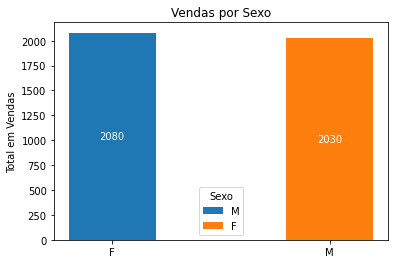

In [146]:
fig, ax = plt.subplots()

sexo = df.sexo_cliente.unique()

bar_labels = ['M', 'F']
bar_colors = ['tab:blue', 'tab:orange']

p = ax.bar(sexo, df_vendas_por_sexo['valor'], label=bar_labels, color=bar_colors, width=0.4)

ax.bar_label(p, label_type='center', color = 'white')

ax.set_ylabel('Total em Vendas')
ax.set_title('Vendas por Sexo')
ax.legend(title='Sexo')

plt.show()


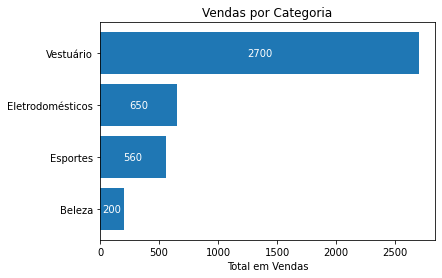

In [147]:
fig, ax = plt.subplots()

categoria = df.categoria.unique()

p = ax.barh(categoria, df_vendas_por_categoria['valor'])

ax.bar_label(p, label_type='center', color = 'white')

ax.set_xlabel('Total em Vendas')
ax.set_title('Vendas por Categoria')

plt.show()

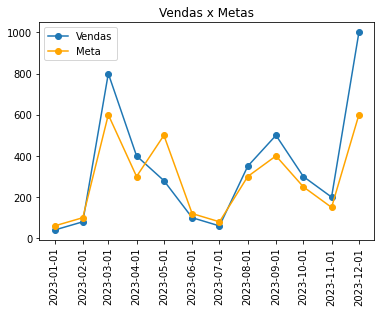

In [164]:
# plt.subplots(figsize = (16, 8))
plt.plot(df_metas['periodo'], df_vendas_por_periodo['valor'], label = "Vendas", marker='o') 
plt.plot(df_metas['periodo'], df_metas['valor'], label = "Meta", color = 'orange', marker='o') 
plt.xticks(df_metas['periodo']);
plt.xticks(rotation=90)
plt.title('Vendas x Metas')
plt.legend() 
plt.show()


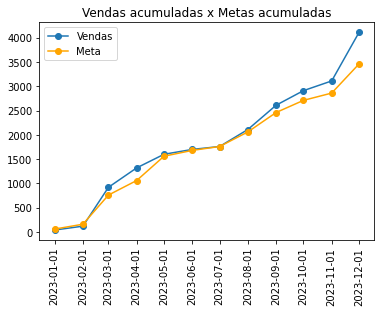

In [165]:
plt.plot(df_metas['periodo'], df_vendas_por_periodo_acumuladas['valor'], label = "Vendas", marker='o') 
plt.plot(df_metas['periodo'], df_metas_acumuladas['valor'], label = "Meta", color = 'orange', marker='o') 
plt.xticks(df_metas['periodo']);
plt.xticks(rotation=90)
plt.title('Vendas acumuladas x Metas acumuladas')
plt.legend() 
plt.show()

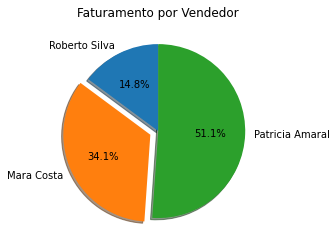

In [192]:
fig, ax = plt.subplots()

vendedor = df.vendedor.unique()

p = ax.pie(df_vendas_por_vendedor['valor'], explode=(0, 0.1, 0), labels=vendedor, autopct='%1.1f%%', shadow=True, startangle=90)

ax.set_title('Faturamento por Vendedor')

plt.show()

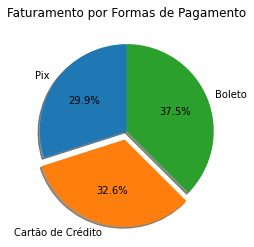

                   quantidade  valor
forma_pagamento                     
Boleto                      5   1230
Pix                        13   1340
Cartão de Crédito          11   1540


In [200]:
fig, ax = plt.subplots()

forma_pagamento = df.forma_pagamento.unique()

p = ax.pie(df_vendas_por_forma_pgto['valor'], explode=(0, 0.1, 0), labels=forma_pagamento, autopct='%1.1f%%', shadow=True, startangle=90)

ax.set_title('Faturamento por Formas de Pagamento')

plt.show()

print(df_vendas_por_forma_pgto)